In [395]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [396]:
train = pd.read_csv('../data/houseprice_train.csv')
test = pd.read_csv('../data/houseprice_test.csv')

In [397]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [398]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [399]:
test.drop('Id', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)

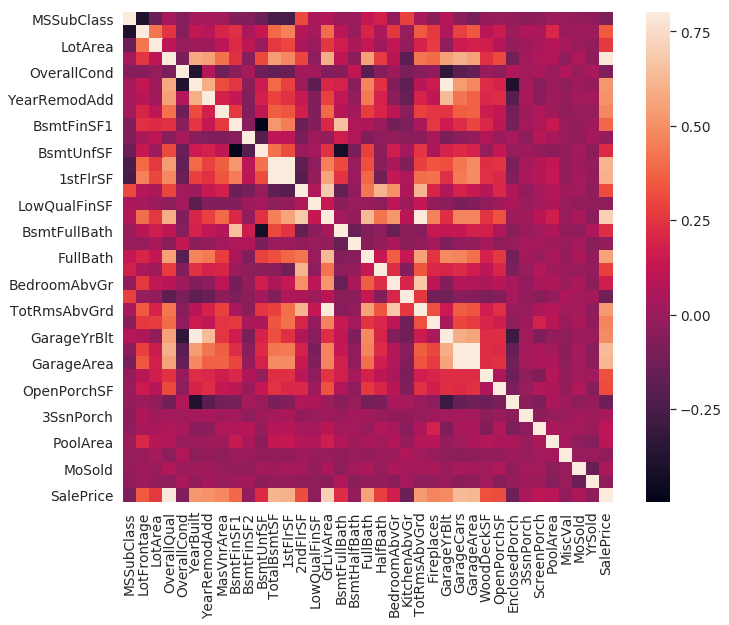

In [400]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

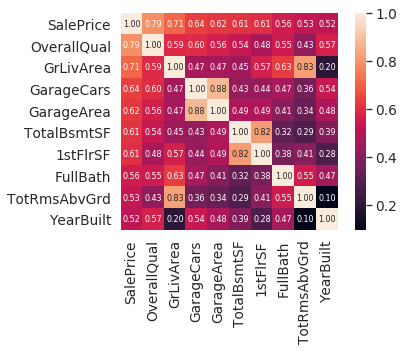

In [401]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

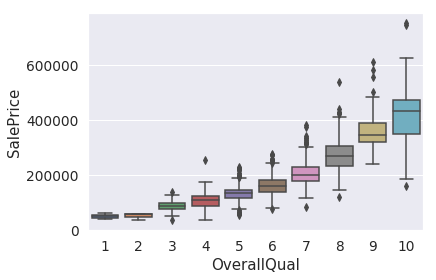

In [402]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

In [403]:
train['OverallQual'].isnull().values.any()

False

Text(0.5, 1.0, 'SalePrice vs. GrLivArea')

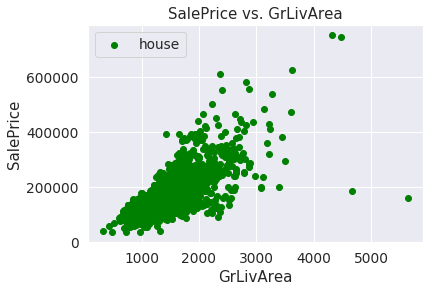

In [404]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='green', label='house')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice vs. GrLivArea')

In [405]:
train['GrLivArea'].isnull().values.any()

False

In [406]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index).reset_index(drop=True)

Text(0.5, 1.0, 'SalePrice vs. GrLivArea')

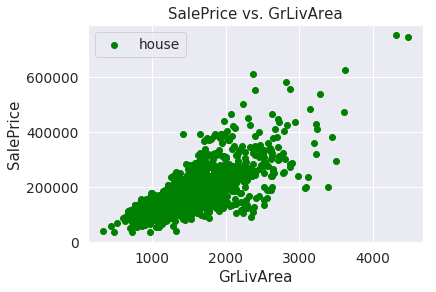

In [407]:
plt.scatter(train['GrLivArea'], train['SalePrice'], color='green', label='house')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.title('SalePrice vs. GrLivArea')

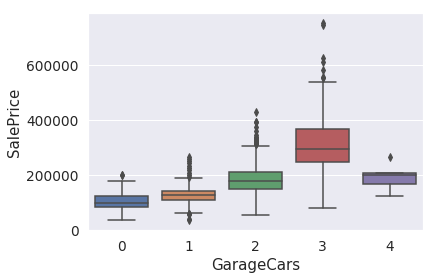

In [408]:
sns.boxplot(x='GarageCars', y='SalePrice', data=train)

In [409]:
train = train.drop(train[train['GarageCars']==4].index).reset_index(drop=True)

In [410]:
train['GarageCars'].isnull().values.any()

False

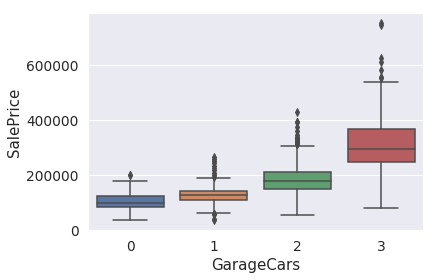

In [411]:
sns.boxplot(x='GarageCars', y='SalePrice', data=train)

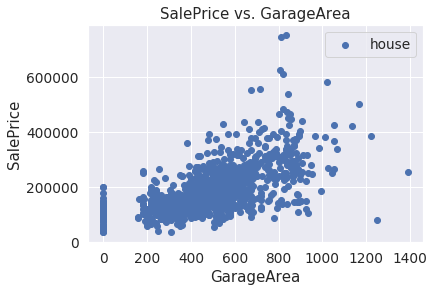

In [412]:
plt.scatter(train['GarageArea'], train['SalePrice'], label='house')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs. GarageArea')
plt.legend()

In [413]:
train['GarageArea'].isnull().values.any()

False

In [414]:
train = train.drop(train[(train['GarageArea']>1200)&(train['SalePrice']<400000)].index).reset_index(drop=True)

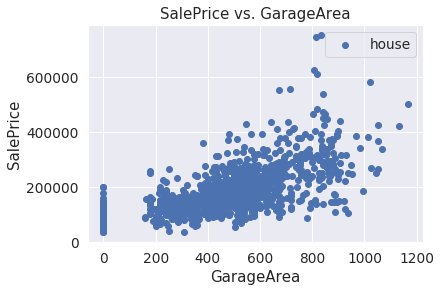

In [415]:
plt.scatter(train['GarageArea'], train['SalePrice'], label='house')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs. GarageArea')
plt.legend()

In [416]:
train['TotalBsmtSF'].isnull().values.any()

False

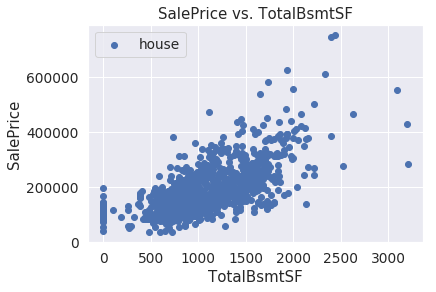

In [417]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], label='house')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('SalePrice vs. TotalBsmtSF')
plt.legend()

In [418]:
train['1stFlrSF'].isnull().values.any()

False

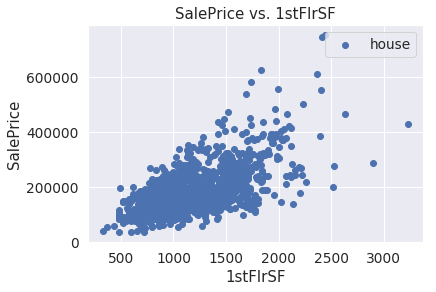

In [419]:
plt.scatter(train['1stFlrSF'], train['SalePrice'], label='house')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('SalePrice vs. 1stFlrSF')
plt.legend()

In [420]:
train['FullBath'].isnull().values.any()

False

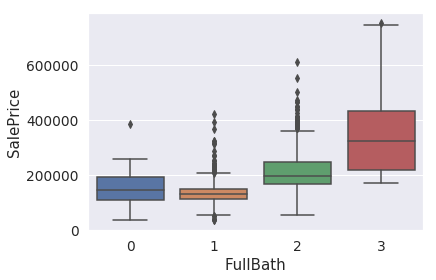

In [421]:
sns.boxplot(x='FullBath', y='SalePrice', data=train)

In [422]:
train['TotRmsAbvGrd'].isnull().values.any()

False

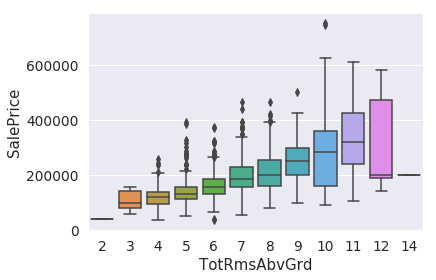

In [423]:
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train)

In [424]:
train['YearBuilt'].isnull().values.any()

False

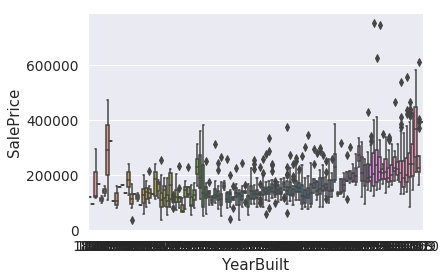

In [425]:
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)

In [426]:
y_train = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)

In [427]:
all_data_na = all_data.isnull().sum() / len(all_data)
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na

PoolQC          0.996906
MiscFeature     0.964249
Alley           0.932279
Fence           0.804056
FireplaceQu     0.486765
LotFrontage     0.166724
GarageFinish    0.054658
GarageYrBlt     0.054658
GarageQual      0.054658
GarageCond      0.054658
GarageType      0.053970
BsmtExposure    0.028188
BsmtCond        0.028188
BsmtQual        0.027845
BsmtFinType2    0.027501
BsmtFinType1    0.027157
MasVnrType      0.008250
MasVnrArea      0.007906
MSZoning        0.001375
BsmtFullBath    0.000688
BsmtHalfBath    0.000688
Utilities       0.000688
Functional      0.000688
Exterior2nd     0.000344
Exterior1st     0.000344
SaleType        0.000344
BsmtFinSF1      0.000344
BsmtFinSF2      0.000344
BsmtUnfSF       0.000344
Electrical      0.000344
KitchenQual     0.000344
GarageCars      0.000344
GarageArea      0.000344
TotalBsmtSF     0.000344
dtype: float64

In [428]:
col_none = all_data_na.index[:5]
for col in col_none:
    all_data[col] = all_data[col].fillna('None')

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [429]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [430]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [431]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
col_SF = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
for col in col_SF:
    all_data.drop(col, axis=1, inplace=True)

all_data = pd.get_dummies(all_data)

In [432]:
new_train = all_data[:len(train)]
new_test = all_data[len(train):]

In [433]:
new_train = pd.concat([new_train, pd.DataFrame(y_train)], axis=1)

In [434]:
train_share = 0.7
train_part_len = int(train_share * new_train.shape[0])

X = new_train.drop('SalePrice', axis=1)
y = new_train['SalePrice']

X_train  = X.values[:train_part_len, :]
X_valid = X.values[train_part_len:, :]
y_train  = y.values[:train_part_len]
y_valid = y.values[train_part_len:]

In [435]:
model = LinearRegression()

In [436]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [437]:
model_pred = model.predict(X_valid)

In [438]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [439]:
rmse(y_valid, model_pred)

29299.819413013287

In [440]:
model.score(X_valid, y_valid)

0.8604787379011362